In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
import quandl

In [177]:
sbi=quandl.get('NSE/SBIN.5',start_date='2017-01-01',end_date='2018-01-01')
hdfc=quandl.get('NSE/HDFCBANK.5',start_date='2017-01-01',end_date='2018-01-01')
axis=quandl.get('NSE/AXISBANK.5',start_date='2017-01-01',end_date='2018-01-01')


LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [178]:
for stock_df in (sbi,hdfc,axis):
    stock_df['Normed Return']=stock_df['Close']/stock_df.iloc[0]['Close']

In [179]:
for stock_df,allo in zip([sbi,hdfc,axis],[.3,.4,.3]):
    stock_df['Allocation']=stock_df['Normed Return']*allo

In [180]:
for stock_df in [sbi,hdfc,axis]:
    stock_df['Postion Values']=stock_df['Allocation']*1000000
    

In [181]:
portfolio_val=pd.concat([sbi['Postion Values'],hdfc['Postion Values'],axis['Postion Values']],axis=1)

In [182]:
portfolio_val.head()

,Postion Values,Postion Values,Postion Values
Date,,,
2017-01-02,300000.000000,400000.000000,300000.000000
2017-01-03,301600.985222,397594.185949,305025.125628
2017-01-04,299137.931034,396123.966252,303584.589615
2017-01-05,302155.172414,396357.864840,306901.172529
2017-01-06,302832.512315,398847.214101,304991.624791


In [183]:
portfolio_val.columns = ['SBI Pos','HDFC Pos','AXIS Pos']

In [184]:
portfolio_val.head()

,SBI Pos,HDFC Pos,AXIS Pos
Date,,,
2017-01-02,300000.000000,400000.000000,300000.000000
2017-01-03,301600.985222,397594.185949,305025.125628
2017-01-04,299137.931034,396123.966252,303584.589615
2017-01-05,302155.172414,396357.864840,306901.172529
2017-01-06,302832.512315,398847.214101,304991.624791


In [185]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [186]:
portfolio_val.head()

,SBI Pos,HDFC Pos,AXIS Pos,Total Pos
Date,,,,
2017-01-02,300000.000000,400000.000000,300000.000000,1.000000e+06
2017-01-03,301600.985222,397594.185949,305025.125628,1.004220e+06
2017-01-04,299137.931034,396123.966252,303584.589615,9.988465e+05
2017-01-05,302155.172414,396357.864840,306901.172529,1.005414e+06
2017-01-06,302832.512315,398847.214101,304991.624791,1.006671e+06


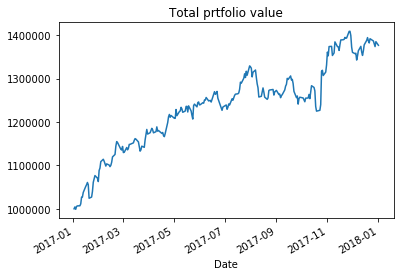

In [187]:
portfolio_val['Total Pos'].plot() 
plt.title('Total prtfolio value')

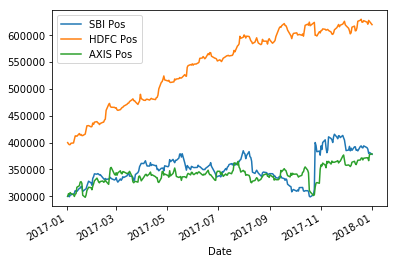

In [188]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [189]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [190]:
portfolio_val.tail()

,SBI Pos,HDFC Pos,AXIS Pos,Total Pos,Daily Return
Date,,,,,
2017-12-26,390578.817734,624292.039094,371859.296482,1.386730e+06,-0.003708
2017-12-27,387746.305419,620416.005346,371591.289782,1.379754e+06,-0.005031
2017-12-28,379802.955665,627533.205246,366398.659966,1.373735e+06,-0.004362
2017-12-29,381650.246305,625645.309498,377855.946399,1.385152e+06,0.008311
2018-01-01,378201.970443,619664.188455,378894.472362,1.376761e+06,-0.006058


In [191]:
portfolio_val['Daily Return'].mean()

0.001333388026468699

In [192]:
portfolio_val['Daily Return'].std()

0.009357480043977795

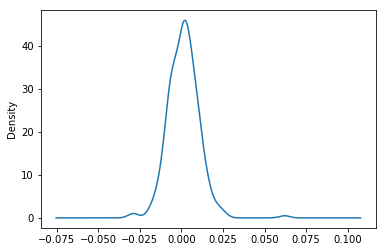

In [193]:
portfolio_val['Daily Return'].plot(kind='kde')

# Sharpe Ratio

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

daily_rate = ((1.0 + yearly_rate)**(1/252))-1


In [194]:

volatility = portfolio_val['Daily Return'].std() * np.sqrt(252) 
SR = (portfolio_val['Daily Return'].mean()  - 0.05) / volatility



In [195]:
SR

-0.32762115194247399

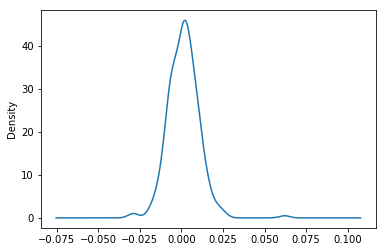

In [196]:
portfolio_val['Daily Return'].plot('kde')

## Optimization


In [197]:
stocks=pd.concat([sbi['Close'],hdfc['Close'],axis['Close']],axis=1)
stocks.columns=['sbi','hdfc','axis']

In [198]:
stocks.head()

,sbi,hdfc,axis
Date,,,
2017-01-02,243.60,1197.10,447.75
2017-01-03,244.90,1189.90,455.25
2017-01-04,242.90,1185.50,453.10
2017-01-05,245.35,1186.20,458.05
2017-01-06,245.90,1193.65,455.20


In [199]:
stocks.tail()

,sbi,hdfc,axis
Date,,,
2017-12-26,317.15,1868.35,555.00
2017-12-27,314.85,1856.75,554.60
2017-12-28,308.40,1878.05,546.85
2017-12-29,309.90,1872.40,563.95
2018-01-01,307.10,1854.50,565.50


In [200]:
mean_daily_return=stocks.pct_change(1).mean()


In [201]:
mean_daily_return

sbi     0.001175
hdfc    0.001802
axis    0.001088
dtype: float64

In [202]:
stocks.pct_change(1).corr()

,sbi,hdfc,axis
sbi,1.000000,-0.103720,0.313767
hdfc,-0.103720,1.000000,0.015661
axis,0.313767,0.015661,1.000000


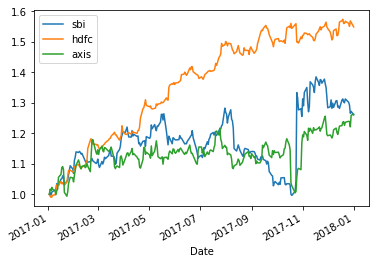

In [203]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot();

In [204]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,sbi,hdfc,axis
Date,,,
2017-01-02,NaN,NaN,NaN
2017-01-03,0.005337,-0.006015,0.016750
2017-01-04,-0.008167,-0.003698,-0.004723
2017-01-05,0.010086,0.000590,0.010925
2017-01-06,0.002242,0.006281,-0.006222


In [205]:
#log_return
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,sbi,hdfc,axis
Date,,,
2017-01-02,NaN,NaN,NaN
2017-01-03,0.005322,-0.006033,0.016612
2017-01-04,-0.008200,-0.003705,-0.004734
2017-01-05,0.010036,0.000590,0.010865
2017-01-06,0.002239,0.006261,-0.006241


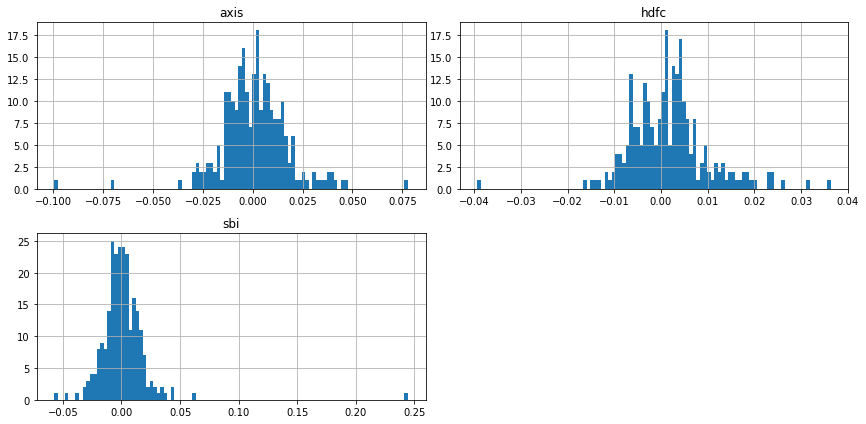

In [206]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [207]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sbi,248.0,0.000934,0.021486,-0.057396,-0.008176,-0.000191,0.009149,0.244413
hdfc,248.0,0.001765,0.008422,-0.039326,-0.003476,0.001265,0.005082,0.036345
axis,248.0,0.000941,0.017158,-0.099607,-0.008246,0.001151,0.009548,0.077783


In [208]:
log_ret.mean() * 252 

sbi     0.235382
hdfc    0.444773
axis    0.237241
dtype: float64

In [209]:
log_ret.cov()

,sbi,hdfc,axis
sbi,0.000462,-0.000016,0.000118
hdfc,-0.000016,0.000071,0.000002
axis,0.000118,0.000002,0.000294


In [210]:
log_ret.cov()*252 

,sbi,hdfc,axis
sbi,0.116336,-0.003938,0.029702
hdfc,-0.003938,0.017874,0.000561
axis,0.029702,0.000561,0.074186


In [211]:
np.random.seed(101)
# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(3))
print(weights)
print('\n')


# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

#Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = (exp_ret-0.05)/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['sbi', 'hdfc', 'axis'], dtype='object')


Creating Random Weights
[ 0.51639863  0.57066759  0.02847423]


Rebalance to sum to 1.0
[ 0.46291341  0.51156154  0.02552505]


Expected Portfolio Return
0.342545908417


Expected Volatility
0.16883978032


Sharpe Ratio
1.73268354094


In [215]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(3))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind]= np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = (ret_arr[ind]-0.05)/vol_arr[ind]

In [216]:
stocks.tail()

,sbi,hdfc,axis
Date,,,
2017-12-26,317.15,1868.35,555.00
2017-12-27,314.85,1856.75,554.60
2017-12-28,308.40,1878.05,546.85
2017-12-29,309.90,1872.40,563.95
2018-01-01,307.10,1854.50,565.50


In [217]:
sharpe_arr.max()

3.0862656238215784

In [218]:
sharpe_arr.argmax()

1581

In [219]:
all_weights[1419,:]

array([ 0.01684035,  0.71000072,  0.27315893])

In [220]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

In [237]:
max_sr_ret

0.38455759065821571

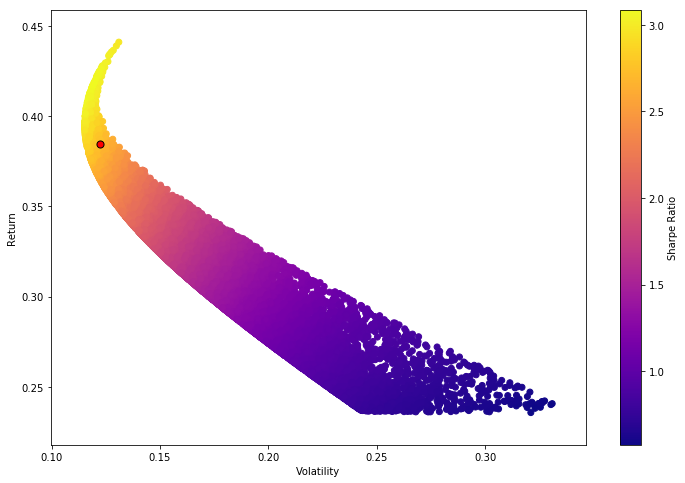

In [221]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [222]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = (ret-0.05)/vol
    return np.array([ret,vol,sr])

In [223]:
from scipy.optimize import minimize

In [224]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [246]:

def check_sum(weights):
    return np.sum(weights) - 1

In [226]:
cons = ({'type':'eq','fun': check_sum})

In [227]:
bounds = ((0, 1), (0, 1), (0, 1)) 

In [228]:
init_guess = [0.4,0.6,0.4]

In [229]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [230]:
opt_results

     fun: -3.0864259115850676
     jac: array([-0.4151606 , -0.42151338, -0.42257455])
 message: 'Optimization terminated successfully.'
    nfev: 33
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 0.07507371,  0.86436304,  0.06056325])

In [231]:
opt_results.x

array([ 0.07507371,  0.86436304,  0.06056325])

In [232]:
get_ret_vol_sr(opt_results.x)

array([ 0.41648447,  0.11874073,  3.08642591])

In [242]:
frontier_y = np.linspace(0,0.45,100) # 

In [243]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [244]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volatility.append(result['fun'])

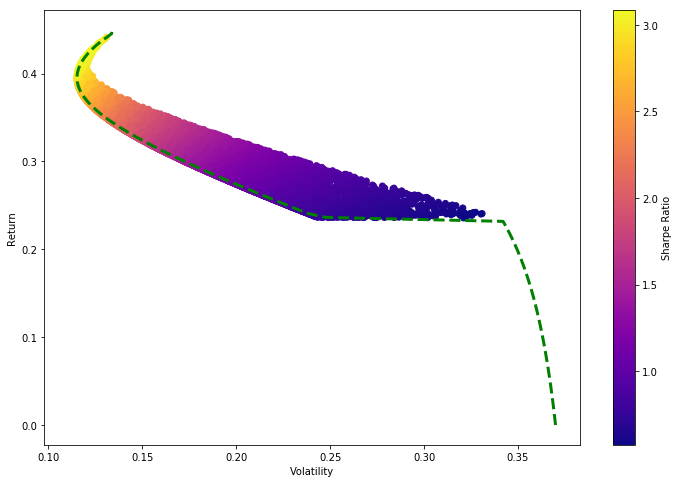

In [245]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)